## Comparing Some Models For Titanic Survival Prediction
In this analysis I will use the following models:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

I have used python 3.11.9



In [1]:
# import libraries
import pandas as pd
import numpy as nb
from sklearn.model_selection import train_test_split


#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# total passengers are 1300

# 891 for train set
train = pd.read_csv('train.csv')
# 418 for test set
test = pd.read_csv('test.csv')

In [3]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# type of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


PassengerId: passenger ID (we are not intersing in it, will be dropped)
Pclass: there are 3 classes ( 1, 2, 3) 
Name: will be dropped
Sex: male and female, will be converted into numrical 0, 1
age: the age of the passenger
sibsp: counting brothers, sisters, spouses
Parch: counting mothers, fathers, daughters, sons 
Ticket: ticket number will be dropped no pattern
Fare: is the amout of the ticket, correlated with pclass so will be considered as leackage, will be dropped.
Cabin: has lots of missing values, will be dropped
Embarked: the port where they aboarted from. Q Queenstown, C Cherbourg, S Southampton 

1. **Data Preprocessing**:

In [6]:
# checking which column has missing values
pd.isnull(train).sum()

# see the values
# train[train['Age'].isnull()]


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# drop columns that are not helpful (keep Fare for prediction, drop Cabin/Ticket)
train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True,errors='ignore')
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True,errors='ignore')

# impute missing values: Embarked with mode, Fare with median
train.fillna({'Embarked':train['Embarked'].mode()[0]},inplace=True)
test.fillna({'Embarked':test['Embarked'].mode()[0]},inplace=True)
train.fillna({'Fare':train['Fare'].median()},inplace=True)
test.fillna({'Fare':test['Fare'].median()},inplace=True)

print("Missing values after imputation:")
print(pd.isnull(train).sum())

Missing values after imputation:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [8]:
# fill missing values by grouping by 'Pclass','SibSp' to get most appropraite age
train['Age'] = train.groupby(['Pclass', 'SibSp'])['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Pclass', 'SibSp'])['Age'].transform(lambda x: x.fillna(x.median()))

In [9]:
# after running this code, I noticed that there are 7 
pd.isnull(train).sum()

Survived    0
Pclass      0
Sex         0
Age         7
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
# groupby only Pclass
train['Age'] = train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


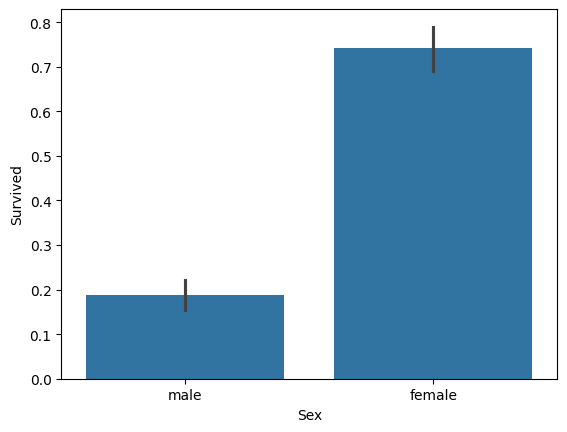

In [11]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


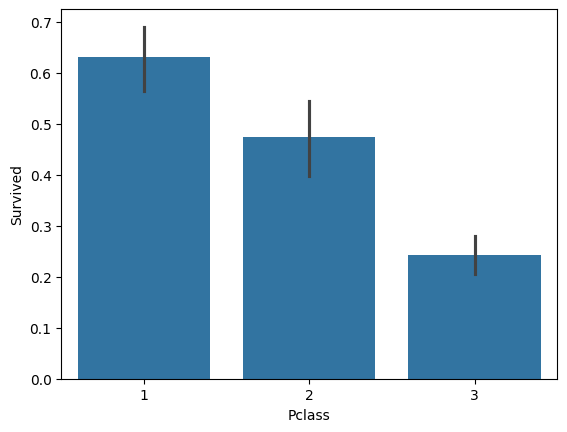

In [12]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [13]:
# map Sex to numerical
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

# add feature engineering: FamilySize and IsAlone
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,S,2,0
1,1,1,1,38.0,1,0,71.2833,C,2,0
2,1,3,1,26.0,0,0,7.9250,S,1,1
3,1,1,1,35.0,1,0,53.1000,S,2,0
4,0,3,0,35.0,0,0,8.0500,S,1,1


In [14]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,1,2,0
1,1,1,1,38.0,1,0,71.2833,2,2,0
2,1,3,1,26.0,0,0,7.9250,1,1,1
3,1,1,1,35.0,1,0,53.1000,1,2,0
4,0,3,0,35.0,0,0,8.0500,1,1,1


In [15]:
target = train["Survived"]
predictors = train.drop(['Survived'], axis=1)
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

81.22


In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.76


## Here I get assist from AI to write the metrics for all models

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate comprehensive metrics for all models
# Logistic Regression
y_pred_lr = logreg.predict(x_val)
y_pred_lr_proba = logreg.predict_proba(x_val)[:, 1]
acc_lr = round(accuracy_score(y_pred_lr, y_val) * 100, 2)
prec_lr = round(precision_score(y_pred_lr, y_val) * 100, 2)
rec_lr = round(recall_score(y_pred_lr, y_val) * 100, 2)
f1_lr = round(f1_score(y_pred_lr, y_val) * 100, 2)
roc_lr = round(roc_auc_score(y_val, y_pred_lr_proba) * 100, 2)

# Decision Tree
y_pred_dt = decisiontree.predict(x_val)
y_pred_dt_proba = decisiontree.predict_proba(x_val)[:, 1]
acc_dt = round(accuracy_score(y_pred_dt, y_val) * 100, 2)
prec_dt = round(precision_score(y_pred_dt, y_val) * 100, 2)
rec_dt = round(recall_score(y_pred_dt, y_val) * 100, 2)
f1_dt = round(f1_score(y_pred_dt, y_val) * 100, 2)
roc_dt = round(roc_auc_score(y_val, y_pred_dt_proba) * 100, 2)

# Random Forest
y_pred_rf = randomforest.predict(x_val)
y_pred_rf_proba = randomforest.predict_proba(x_val)[:, 1]
acc_rf = round(accuracy_score(y_pred_rf, y_val) * 100, 2)
prec_rf = round(precision_score(y_pred_rf, y_val) * 100, 2)
rec_rf = round(recall_score(y_pred_rf, y_val) * 100, 2)
f1_rf = round(f1_score(y_pred_rf, y_val) * 100, 2)
roc_rf = round(roc_auc_score(y_val, y_pred_rf_proba) * 100, 2)

print("All metrics calculated for comparison")

All metrics calculated for comparison


In [20]:
# Create comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [acc_lr, acc_dt, acc_rf],
    'Precision': [prec_lr, prec_dt, prec_rf],
    'Recall': [rec_lr, rec_dt, rec_rf],
    'F1-Score': [f1_lr, f1_dt, f1_rf],
    'ROC-AUC': [roc_lr, roc_dt, roc_rf]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)
print(f"\nBest Model by ROC-AUC: {comparison.loc[comparison['ROC-AUC'].idxmax(), 'Model']}")
print(f"Best ROC-AUC Score: {comparison['ROC-AUC'].max()}%")


MODEL COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression     81.22      73.97   75.00     74.48    87.68
      Decision Tree     80.20      69.86   75.00     72.34    78.02
      Random Forest     83.76      75.34   79.71     77.46    89.83

Best Model by ROC-AUC: Random Forest
Best ROC-AUC Score: 89.83%


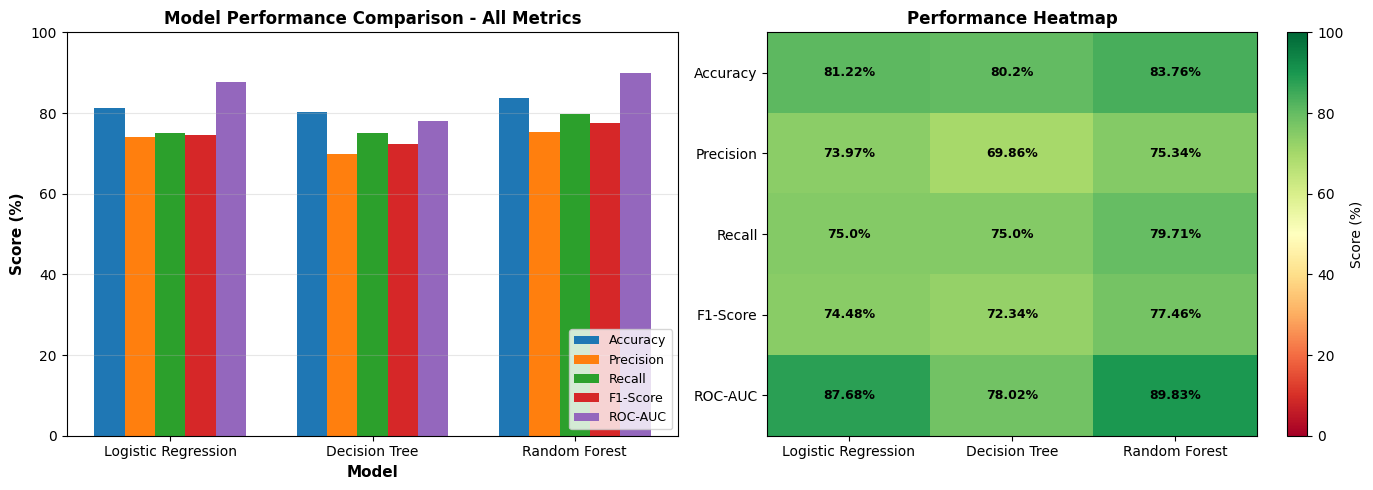

In [21]:
# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
models = comparison['Model'].tolist()

x = range(len(models))
width = 0.15

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, metric in enumerate(metrics):
    values = comparison[metric].tolist()
    axes[0].bar([p + i*width for p in x], values, width, label=metric)

axes[0].set_xlabel('Model', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Score (%)', fontsize=11, fontweight='bold')
axes[0].set_title('Model Performance Comparison - All Metrics', fontsize=12, fontweight='bold')
axes[0].set_xticks([p + width * 2 for p in x])
axes[0].set_xticklabels(models, fontsize=10)
axes[0].legend(loc='lower right', fontsize=9)
axes[0].set_ylim([0, 100])
axes[0].grid(axis='y', alpha=0.3)

# Heatmap-style visualization
im = axes[1].imshow(comparison[metrics].T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, fontsize=10)
axes[1].set_yticks(range(len(metrics)))
axes[1].set_yticklabels(metrics, fontsize=10)
axes[1].set_title('Performance Heatmap', fontsize=12, fontweight='bold')

# Add text annotations to heatmap
for i in range(len(models)):
    for j in range(len(metrics)):
        value = comparison[metrics[j]].iloc[i]
        axes[1].text(i, j, f'{value}%', ha='center', va='center', 
                    color='black' if value > 50 else 'white', fontsize=9, fontweight='bold')

plt.colorbar(im, ax=axes[1], label='Score (%)')
plt.tight_layout()
plt.show()